# Example notebook training of an RL agent using Ray RLlib
#### *(using th CartPole-v1 gym environnment)*

### Import requirements

In [1]:
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.models import ModelCatalog
import numpy as np
import matplotlib.pyplot as plt
import LTCRL.utils as lru               # Utilities for training LTCs with pytorch

### Define a config dictionary for our trainer 

In [2]:
ModelCatalog.register_custom_model("example_rnn_model", lru.TorchRNNModel)

config = {
    # Environment (RLlib understands openAI gym registered strings).
    "env": "CartPole-v1",
    # Use 2 environment workers (aka "rollout workers") that parallelly
    # collect samples from their own environment clone(s).
    "num_workers": 8,
    # Change this to "framework: torch", if you are using PyTorch.
    # Also, use "framework: tf2" for tf2.x eager execution.
    "framework": "torch",
    # Tweak the default model provided automatically by RLlib,
    # given the environment's observation- and action spaces.
    "model": {
        "fcnet_hiddens": [64, 64],
        "fcnet_activation": "relu",
    },
    # Set up a separate evaluation worker set for the
    # `trainer.evaluate()` call after training (see below).
    "evaluation_num_workers": 1,
    # Only for evaluation runs, render the env.
    "evaluation_config": {
        "render_env": True,
    }
}

### Train the agent with our defined config

In [5]:
# Instanciate the PPO trainer object
trainer = PPOTrainer(config=config)

# Run it for n training iterations. A training iteration includes
# parallel sample collection by the environment workers as well as
# loss calculation on the collected batch and a model update.
log = []
iterations = 160
for i in range(iterations):
    print("iteration : " +str(i), ", ")
    log.append(trainer.train())
    print('len : ' + str(log[i]['episode_len_mean']))
    print('avg_rev : ' + str(np.array(log[i]['hist_stats']['episode_reward']).mean()))
    # if i % 5 == 0:
        # trainer.evaluate()
        # trainer.evaluate()

2022-03-14 00:57:00,915	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-03-14 00:57:00,915	WARNING ppo.py:223 -- `train_batch_size` (4000) cannot be achieved with your other settings (num_workers=8 num_envs_per_worker=1 rollout_fragment_length=200)! Auto-adjusting `rollout_fragment_length` to 500.
(pid=53826) 
(pid=53827) 
(pid=53833) 
(pid=53828) 
(pid=53834) 
(pid=53839) 
(pid=53832) 
2022-03-14 00:57:08,814	WARNING deprecation.py:45 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-03-14 00:57:08,814	WARNING trainer.py:2279 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Tr

iteration : 0 , 
(scheduler +1m48s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(scheduler +1m48s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


2022-03-14 00:57:28,403	WARNING worker.py:1257 -- The actor or task with ID ffffffffffffffff3ddb07d7af276eefb4ce1bf201000000 cannot be scheduled right now. You can ignore this message if this Ray cluster is expected to auto-scale or if you specified a runtime_env for this actor or task, which may take time to install.  Otherwise, this is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increasing the resources available to this Ray cluster.
Required resources for this actor or task: {CPU: 1.000000}
Available resources on this node: {0.000000/16.000000 CPU, 5.752837 GiB/5.752837 GiB memory, 2.876419 GiB/2.876419 GiB object_store_memory, 1.000000/1.000000 node:127.0.0.1}
 In total there are 0 pending tasks and 2 pending actors on this node.
(pid=53871) 
(pid=53872) 
(RolloutWorker pid=53871) 2022-03-14 00:57:36,752	WARNING deprecation.py:45 -- DeprecationWarning: `rllib.env.remote_vector_env.RemoteVectorEnv` has been dep

len : 21.52513966480447
avg_rev : 21.52513966480447
iteration : 1 , 
len : 31.6015625
avg_rev : 31.6015625
iteration : 2 , 
len : 49.7
avg_rev : 49.7
iteration : 3 , 
len : 70.04
avg_rev : 70.04
iteration : 4 , 
len : 92.5
avg_rev : 92.5
iteration : 5 , 
len : 121.56
avg_rev : 121.56
iteration : 6 , 
len : 151.22
avg_rev : 151.22
iteration : 7 , 
len : 177.0
avg_rev : 177.0
iteration : 8 , 
len : 204.46
avg_rev : 204.46
iteration : 9 , 
len : 224.31
avg_rev : 224.31
iteration : 10 , 
len : 248.16
avg_rev : 248.16
iteration : 11 , 
len : 274.68
avg_rev : 274.68
iteration : 12 , 
len : 290.18
avg_rev : 290.18
iteration : 13 , 
len : 303.14
avg_rev : 303.14
iteration : 14 , 
len : 318.69
avg_rev : 318.69
iteration : 15 , 
len : 335.82
avg_rev : 335.82
iteration : 16 , 
len : 341.85
avg_rev : 341.85
iteration : 17 , 
len : 349.88
avg_rev : 349.88
iteration : 18 , 
len : 370.79
avg_rev : 370.79
iteration : 19 , 
len : 364.45
avg_rev : 364.45
iteration : 20 , 
len : 371.26
avg_rev : 371.26
i

Text(0.5, 1.0, 'Mean reward (reward = ep_length)')

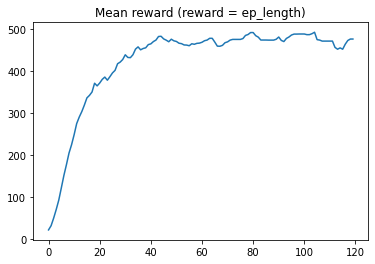

In [21]:
mean_rev = np.array(list(l['episode_reward_mean'] for l in log))
plt.plot(mean_rev)
plt.title('Mean reward (reward = ep_length)')

In [23]:
# Evaluate the trained Trainer (and render each timestep to the shell's
# output).
trainer.evaluate()

{'evaluation': {'episode_reward_max': 500.0,
  'episode_reward_min': 500.0,
  'episode_reward_mean': 500.0,
  'episode_len_mean': 500.0,
  'episode_media': {},
  'episodes_this_iter': 10,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0,
    500.0],
   'episode_lengths': [500, 500, 500, 500, 500, 500, 500, 500, 500, 500]},
  'sampler_perf': {'mean_raw_obs_processing_ms': 0.13474112593844145,
   'mean_inference_ms': 1.083336964603999,
   'mean_action_processing_ms': 0.06280007475769803,
   'mean_env_wait_ms': 0.09842981433544397,
   'mean_env_render_ms': 5.973688844646225},
  'off_policy_estimator': {},
  'timesteps_this_iter': 0}}